In [282]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [283]:
file_path = '/Users/sanjitteja/Desktop/ML/Attrition_data.csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')

# Display the DataFrame
print(df.head())

   S.No    EmpID Emp Name        DOJ                 Designation Grade  \
0     1  XYZ2685     ABC1  22-Nov-10             Sales Executive    E1   
1     2  XYZ2490     ABC2  05-Jul-10  Technical Services Officer    M2   
2     3  XYZ2662     ABC3  20-Oct-10             Sales Executive    E1   
3     4  XYZ1679     ABC4  01-May-08                  AM - Sales    M1   
4     5  XYZ2378     ABC5  03-Mar-10            Sales Executive     E1   

  Attrition        Location In Active Date  Tenure  ...  \
0        Yes      Bhavnagar      26-May-12   1. 6   ...   
1        Yes      Jayanagar      06-Apr-12   1. 9   ...   
2        Yes         Indore      07-Apr-12   1. 5   ...   
3        Yes  Admin Gujarat      03-Apr-12  3 .11   ...   
4        Yes   Jagdishpuram      10-Apr-12   2 .1   ...   

                                          Remarks lower location  DoubtFul  \
0                         Issues with the Manager      bhavnagar        NO   
1  More Challenging Job Roles/ Higher design

Dataframe offers a tabular structure

In [284]:
df.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Remarks,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,...,Issues with the Manager,bhavnagar,NO,bhavnagar,NO,City in Gujarat,bhavnagar,gujarat,west,NaN
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,06-Apr-12,1. 9,...,More Challenging Job Roles/ Higher designation,jayanagar,YES,jayanagar,NO,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th..."
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1. 5,...,Issues with the Manager,indore,NO,indore,NO,NaN,indore,madhya pradesh,central,NaN
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,...,Lack of Growth,admin gujarat,NO,admin gujarat,NO,NaN,NaN,gujarat,west,NaN
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,...,Issues with the Manager,jagdishpuram,YES,jagdishpuram,NO,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th..."


In [285]:
df['DoubtFul'].value_counts()

DoubtFul
NO     297
YES     28
Name: count, dtype: int64

In [286]:
df.drop(['S.No', 'EmpID', 'Attrition ', 'Emp Name', 'Location', 'DOJ', 'In Active Date'], axis = 1, inplace = True)

In [287]:
df.isna().sum()

Designation                            0
Grade                                  0
Tenure                                 0
Gender                                 0
Education                              0
Age                                    0
Last Rating                            0
Monthly Income                         0
Engagement Score (% Satisfaction)      0
Marital Status                         0
Zone                                   0
Remarks                                0
lower location                         2
DoubtFul                               2
Fixed Location                         2
Changed                                0
location_remarks                     170
City/District                         33
State                                 20
zone_lower                             0
state_remarks                        319
dtype: int64

In [288]:
df.shape

(327, 21)

In [289]:
df['Zone'].unique()

array(['West', 'South', 'CENTRAL', 'North', 'SOUTH', 'NORTH', 'East',
       'HO', 'Central'], dtype=object)

Features of Zone have different notations of same value, So tried to merge same values

In [290]:
df.loc[df['Zone'] == 'South', 'Zone'] = 'SOUTH'
df.loc[df['Zone'] == 'Central', 'Zone'] = 'CENTRAL'
df.loc[df['Zone'] == 'North', 'Zone'] = 'NORTH'

In [291]:
df['Zone'].unique()

array(['West', 'SOUTH', 'CENTRAL', 'NORTH', 'East', 'HO'], dtype=object)

In [292]:
df['Remarks'].unique()

array(['Issues with the Manager',
       'More Challenging Job Roles/ Higher designation', 'Lack of Growth',
       'Better Salary', 'Absconding', 'Termination - Theft',
       'Reasons not known', 'Higher education', 'Health Reasons',
       'Termination - Poor Performance'], dtype=object)

Remarks is a valuable feature, it is important to include in the data but it has lot of remark values 

In [293]:
df['Remarks'].value_counts()

Remarks
Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Absconding                                          8
Termination - Theft                                 6
Health Reasons                                      4
Higher education                                    3
Reasons not known                                   2
Name: count, dtype: int64

Some of the small instances of Remark values can be exculded from the data, So that it could be easy to encode the feature

In [294]:
exclude_values = ['Absconding', 'Termination - Theft', 'Health Reasons', 'Higher education', 'Reasons not known']

df = df[~df['Remarks'].isin(exclude_values)]

In [295]:
df['Remarks'].value_counts()

Remarks
Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Name: count, dtype: int64

In [296]:
df['Designation'].value_counts()

Designation
Sales Executive               171
Sales Executive                37
Technical Services Officer     26
Sr Sales Executive             23
AM - Sales                     22
Sr Sales Executive             10
 Sales Executive                7
Regional Manager                4
Zonal Manager                   3
National Sales Head             1
Name: count, dtype: int64

Similar to remarks designation also have a lot of Unneccesary values

Exculded all the small no.of instances

In [297]:
exclude_values = ['National Sales Head', 'Zonal Manager']

df = df[~df['Designation'].isin(exclude_values)]

In [298]:
df['Designation'].value_counts()

Designation
Sales Executive               171
Sales Executive                37
Technical Services Officer     26
Sr Sales Executive             23
AM - Sales                     22
Sr Sales Executive             10
 Sales Executive                7
Regional Manager                4
Name: count, dtype: int64

In [299]:
df.shape

(300, 21)

In [300]:
df['Engagement Score'] = df['Engagement Score (% Satisfaction)'].str.rstrip('%').astype(int)


df.drop(columns=['Engagement Score (% Satisfaction)'], inplace=True)

Feature engagement score is an String with '%' symbol, So converted it into a integer by stripping off the symbol

In [301]:
df['Tenure']

0       1. 6 
1       1. 9 
2       1. 5 
3      3 .11 
4       2 .1 
        ...  
322     4 .9 
323     0. 5 
324     7 .3 
325     8 .8 
326     0. 0 
Name: Tenure, Length: 300, dtype: object

In [302]:
df['Tenure'] = df['Tenure'].str.replace(' ', '')

df['Tenure'] = df['Tenure'].astype(float).round().astype(int)


In [303]:
df['Tenure']

0      2
1      2
2      2
3      3
4      2
      ..
322    5
323    0
324    7
325    9
326    0
Name: Tenure, Length: 300, dtype: int64

feature tenure contains some string whilst representing strings like '3. 10'. Converted them into integers

In [304]:
df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Marital Status,Zone,...,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks,Engagement Score
0,Sales Executive,E1,2,Female,Bachelors,27,4,25535,Divorced,West,...,bhavnagar,NO,bhavnagar,NO,City in Gujarat,bhavnagar,gujarat,west,NaN,2
1,Technical Services Officer,M2,2,Male,MBA,36,2,52155,Single,SOUTH,...,jayanagar,YES,jayanagar,NO,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th...",45
2,Sales Executive,E1,2,Male,Bachelors,24,4,26438,Divorced,CENTRAL,...,indore,NO,indore,NO,NaN,indore,madhya pradesh,central,NaN,18
3,AM - Sales,M1,3,Male,Bachelors,33,2,54311,Single,West,...,admin gujarat,NO,admin gujarat,NO,NaN,NaN,gujarat,west,NaN,82
4,Sales Executive,E1,2,Male,Bachelors,24,4,26702,Divorced,NORTH,...,jagdishpuram,YES,jagdishpuram,NO,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th...",49


In [305]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for feature in ['Designation', 'Gender', 'Education', 'Marital Status', 'Zone', 'Remarks', 'DoubtFul', 'Changed']:
    df[feature] = LE.fit_transform(df[feature])
df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Marital Status,Zone,...,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks,Engagement Score
0,3,E1,2,0,0,27,4,25535,0,5,...,bhavnagar,0,bhavnagar,0,City in Gujarat,bhavnagar,gujarat,west,NaN,2
1,7,M2,2,1,1,36,2,52155,2,4,...,jayanagar,1,jayanagar,0,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th...",45
2,3,E1,2,1,0,24,4,26438,0,0,...,indore,0,indore,0,NaN,indore,madhya pradesh,central,NaN,18
3,1,M1,3,1,0,33,2,54311,2,5,...,admin gujarat,0,admin gujarat,0,NaN,NaN,gujarat,west,NaN,82
4,4,E1,2,1,0,24,4,26702,0,3,...,jagdishpuram,1,jagdishpuram,0,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th...",49


In [306]:
df['DoubtFul'].value_counts()

DoubtFul
0    274
1     24
2      2
Name: count, dtype: int64

In [307]:
df = df[df['DoubtFul'] != 2]

In [308]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['E1','E2','M1', 'M2', 'M3']])

df['Grade'] = encoder.fit_transform(df[['Grade']])

Ordinal Encoding for the feature Grade to differentiate between Grades of the employees which also introduce ordinality in the data

In [309]:
df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Marital Status,Zone,...,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks,Engagement Score
0,3,0.0,2,0,0,27,4,25535,0,5,...,bhavnagar,0,bhavnagar,0,City in Gujarat,bhavnagar,gujarat,west,NaN,2
1,7,3.0,2,1,1,36,2,52155,2,4,...,jayanagar,1,jayanagar,0,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th...",45
2,3,0.0,2,1,0,24,4,26438,0,0,...,indore,0,indore,0,NaN,indore,madhya pradesh,central,NaN,18
3,1,2.0,3,1,0,33,2,54311,2,5,...,admin gujarat,0,admin gujarat,0,NaN,NaN,gujarat,west,NaN,82
4,4,0.0,2,1,0,24,4,26702,0,3,...,jagdishpuram,1,jagdishpuram,0,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th...",49


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 326
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Designation       298 non-null    int64  
 1   Grade             298 non-null    float64
 2   Tenure            298 non-null    int64  
 3   Gender            298 non-null    int64  
 4   Education         298 non-null    int64  
 5   Age               298 non-null    int64  
 6   Last Rating       298 non-null    int64  
 7   Monthly Income    298 non-null    int64  
 8   Marital Status    298 non-null    int64  
 9   Zone              298 non-null    int64  
 10  Remarks           298 non-null    int64  
 11  lower location    298 non-null    object 
 12  DoubtFul          298 non-null    int64  
 13  Fixed Location    298 non-null    object 
 14  Changed           298 non-null    int64  
 15  location_remarks  147 non-null    object 
 16  City/District     271 non-null    object 
 17  St

In [311]:
df.shape

(298, 21)

In [312]:
df.drop(['lower location', 'Fixed Location', 'location_remarks', 'City/District', 'State', 'zone_lower', 'state_remarks'], axis = 1, inplace=True)

Correlation matrix to find out the feature importance 

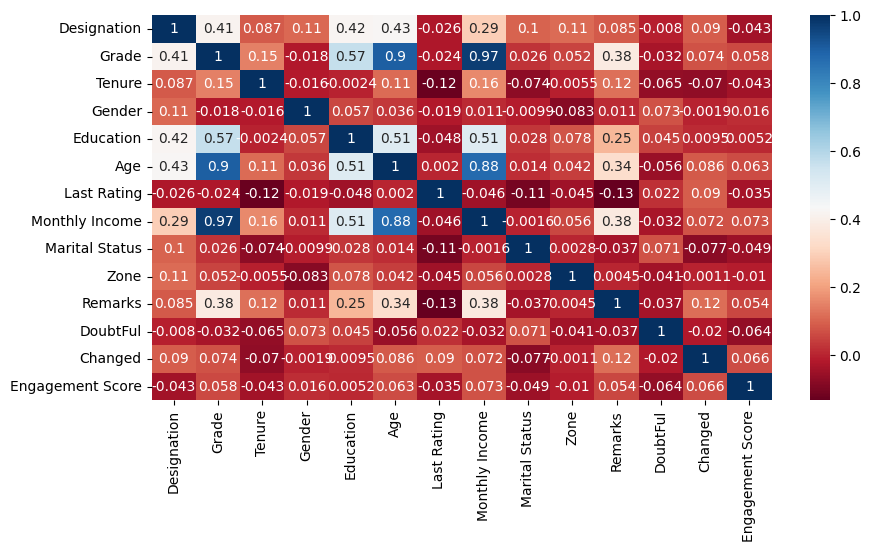

In [313]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

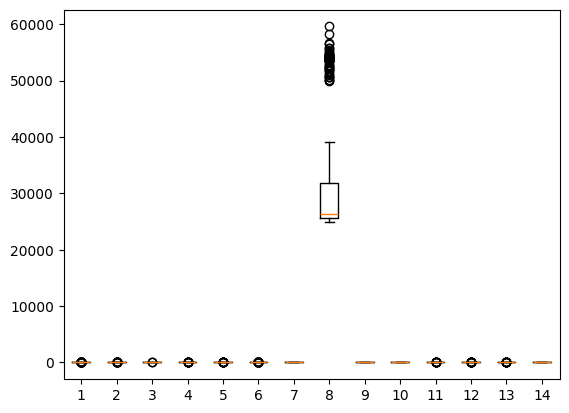

In [314]:
plt.boxplot(df)
plt.show()


In [315]:
df.head()

,Designation,Grade,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Marital Status,Zone,Remarks,DoubtFul,Changed,Engagement Score
0,3,0.0,2,0,0,27,4,25535,0,5,1,0,0,2
1,7,3.0,2,1,1,36,2,52155,2,4,3,1,0,45
2,3,0.0,2,1,0,24,4,26438,0,0,1,0,0,18
3,1,2.0,3,1,0,33,2,54311,2,5,2,0,0,82
4,4,0.0,2,1,0,24,4,26702,0,3,1,1,0,49


In [316]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
X = df.drop('DoubtFul', axis = 1)
y = df['DoubtFul']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)



rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance_rf = feature_importance_rf.drop(['Age'])
top_features = feature_importance_rf.nlargest(5)
print("\nTop 5 Features Contributing to Attrition (based on Random Forest):")
print(top_features)




Top 5 Features Contributing to Attrition (based on Random Forest):
Engagement Score    0.234711
Monthly Income      0.218381
Zone                0.104748
Marital Status      0.079752
Tenure              0.079463
dtype: float64


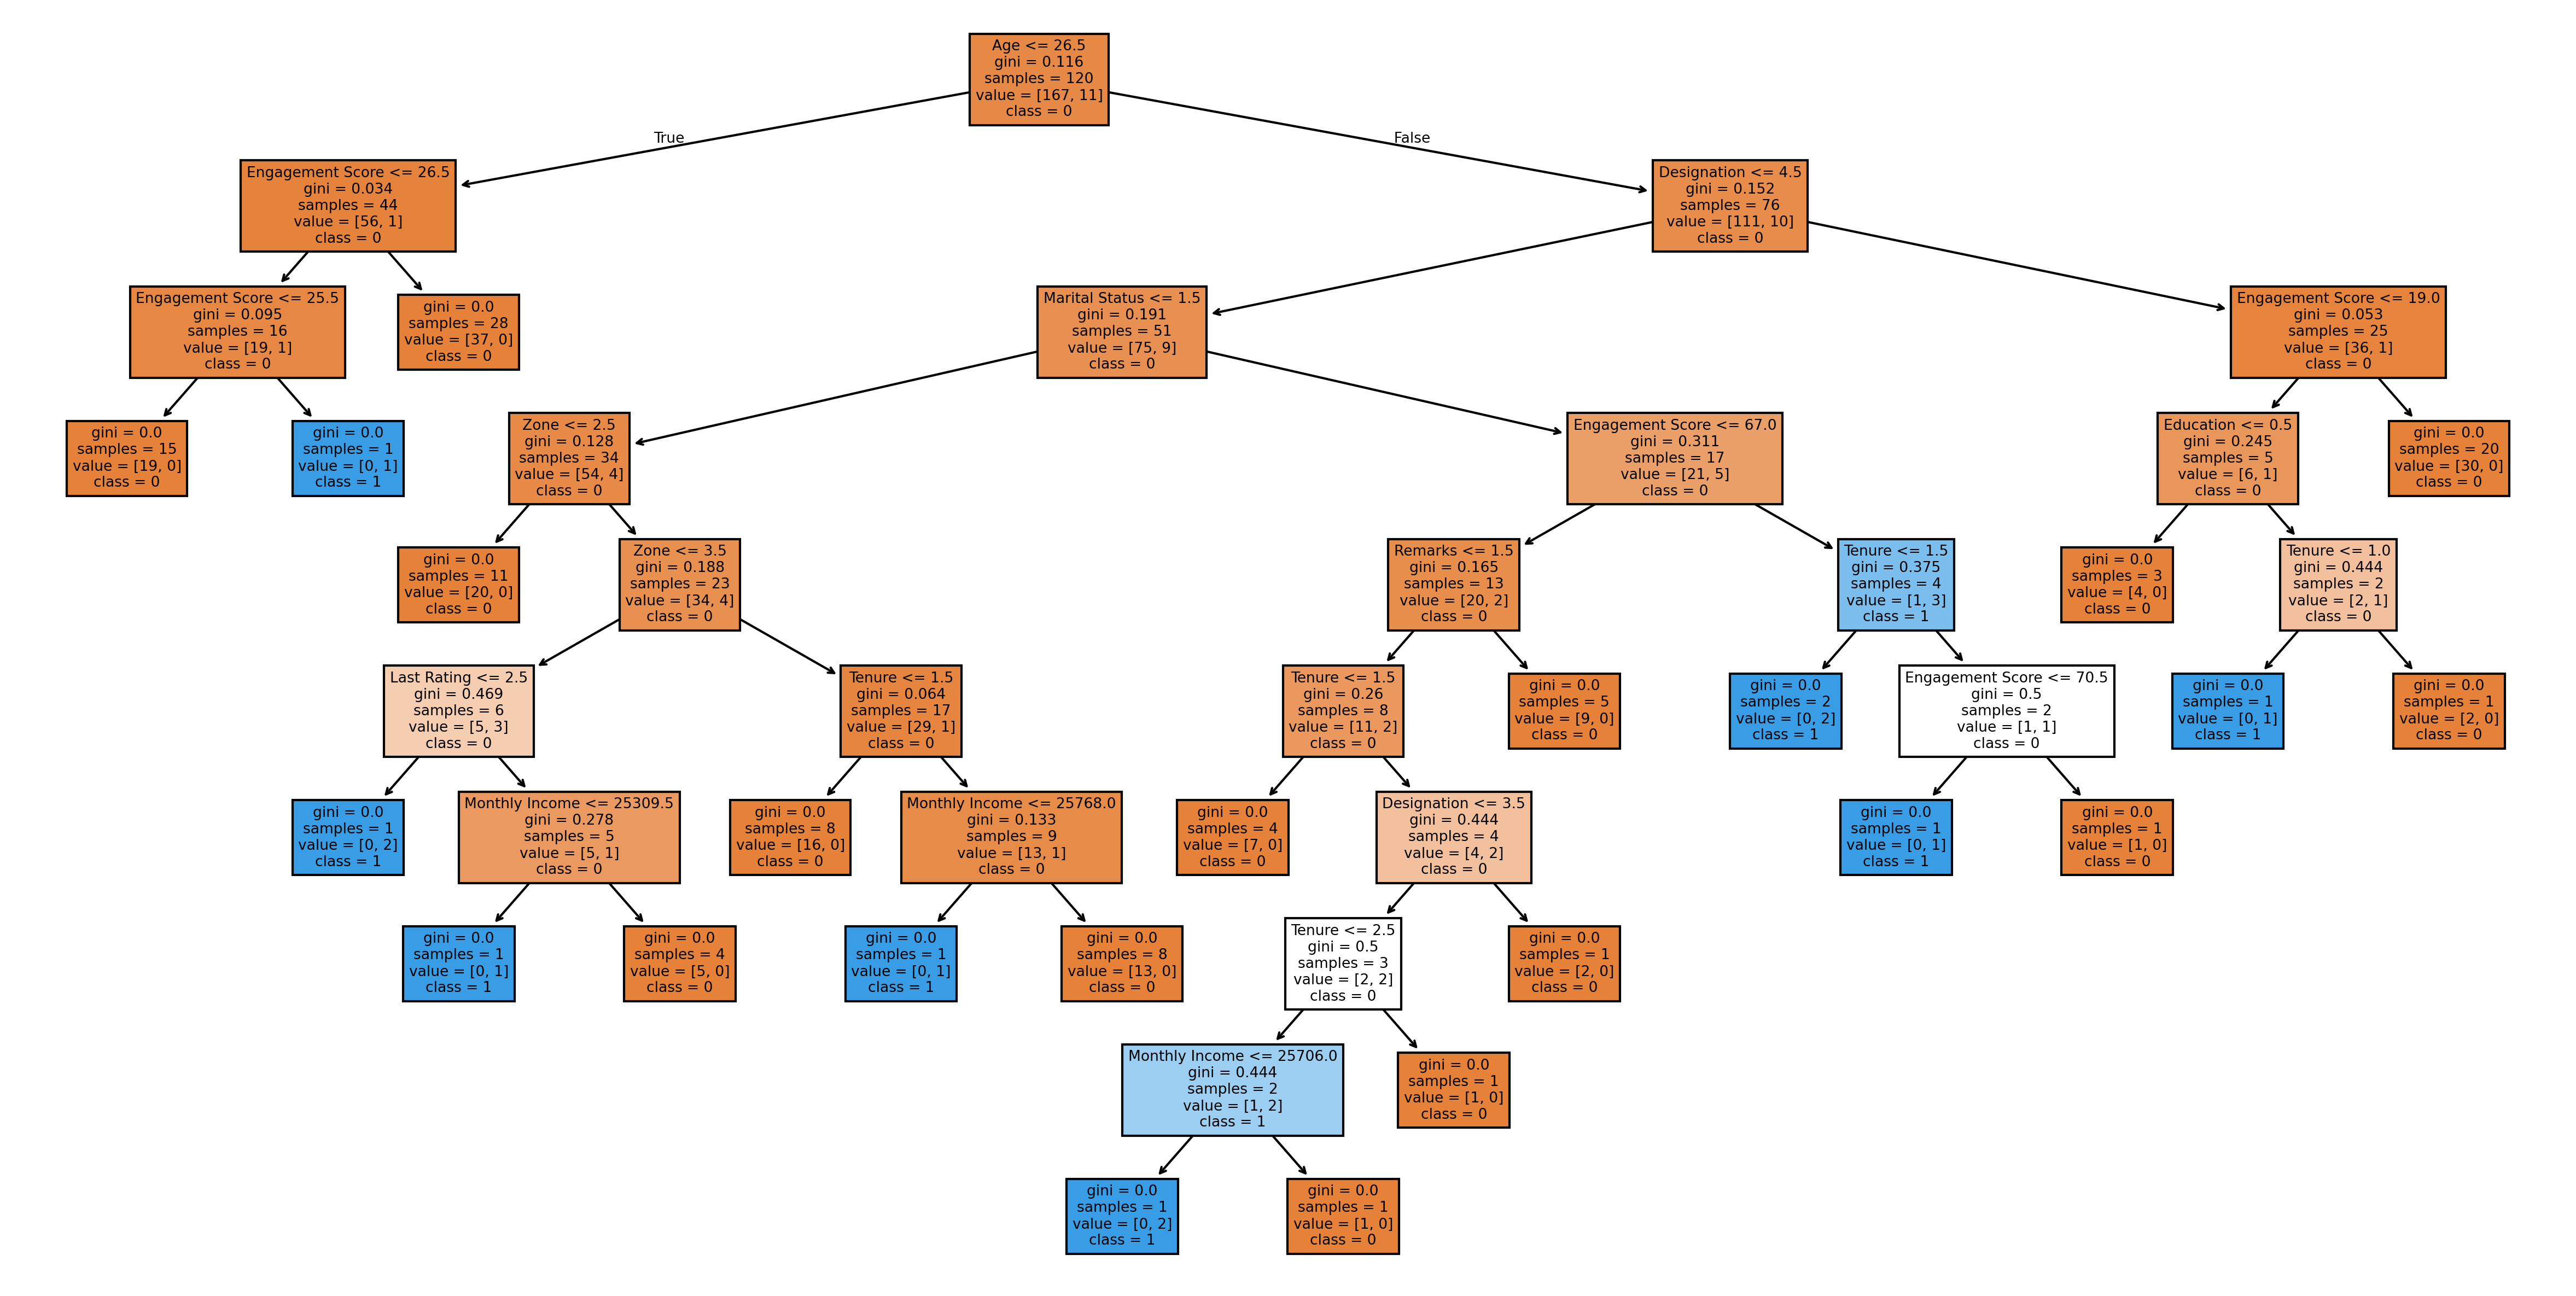

In [317]:
from sklearn.tree import plot_tree
fn = X_train.columns  # Assuming X_train has column names
cn = y_train.unique().astype(str)  # Assuming y_train has class names

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=300)
plot_tree(rf_model.estimators_[0],
          feature_names=fn, 
          class_names=cn,
          filled=True)
fig.savefig('rf_individualtree.png')

# Show the plot
plt.show()

In [318]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, roc_auc_score, precision_recall_curve
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")

Accuracy: 0.95
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/sanjitteja/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [319]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       0.00      0.00      0.00         3

    accuracy                           0.95        60
   macro avg       0.47      0.50      0.49        60
weighted avg       0.90      0.95      0.93        60



/Users/sanjitteja/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanjitteja/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanjitteja/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

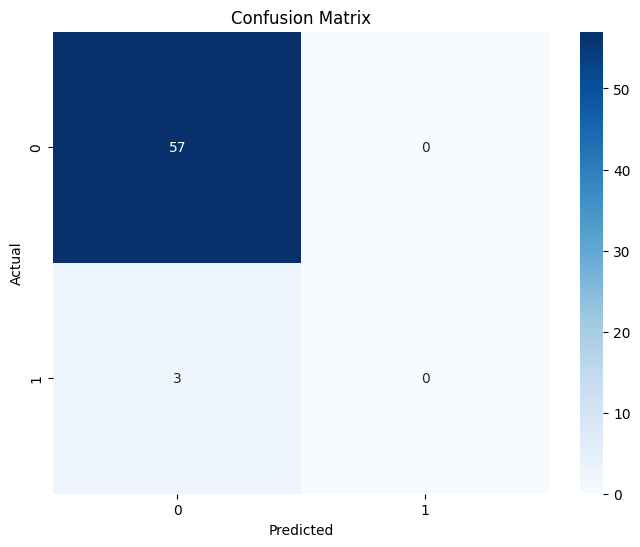

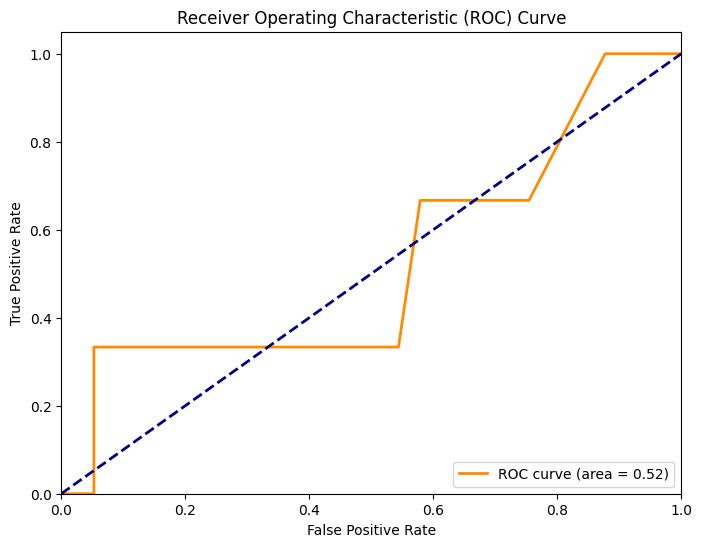

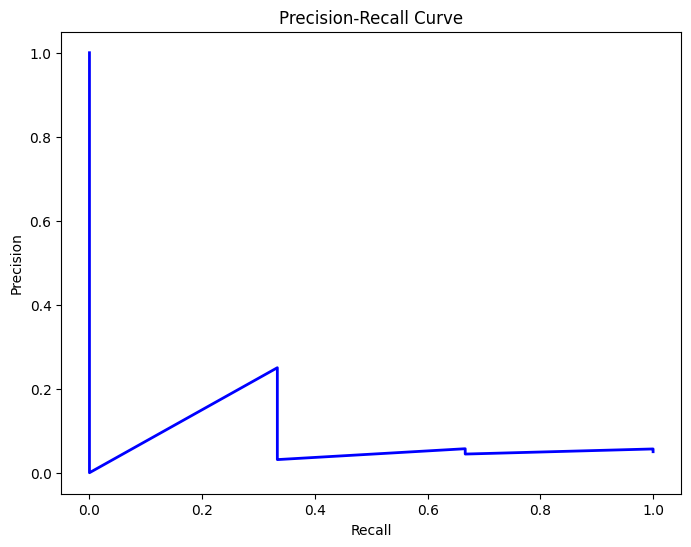

In [320]:
from sklearn.metrics import roc_curve
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [321]:
def generate_recommendations(employee_data, top_features):
    recommendations = []
    for feature_name in top_features.index:
        feature_idx = X.columns.get_loc(feature_name)
        if employee_data[feature_idx] < X_train[feature_name].mean():
            recommendations.append(f"Improve {feature_name} to reduce attrition.")
        else:
            recommendations.append(f"Enhance {feature_name} to increase satisfaction.")
    return recommendations

leaving_indices = [i for i, pred in enumerate(y_test) if pred == 1]

employee_recommendations = []
for i in leaving_indices:
    employee_data = X_test.iloc[i]
    recommendations = generate_recommendations(employee_data, top_features)

    
    employee_recommendations.append((i, recommendations))


for emp_id, recs in employee_recommendations:
#     print('hi')
    print(f"\nEmployee Index: {emp_id}")
    for rec in recs:
        print(rec)



Employee Index: 8
Enhance Engagement Score to increase satisfaction.
Improve Monthly Income to reduce attrition.
Enhance Zone to increase satisfaction.
Enhance Marital Status to increase satisfaction.
Improve Tenure to reduce attrition.

Employee Index: 33
Improve Engagement Score to reduce attrition.
Improve Monthly Income to reduce attrition.
Enhance Zone to increase satisfaction.
Enhance Marital Status to increase satisfaction.
Enhance Tenure to increase satisfaction.

Employee Index: 39
Improve Engagement Score to reduce attrition.
Enhance Monthly Income to increase satisfaction.
Enhance Zone to increase satisfaction.
Improve Marital Status to reduce attrition.
Enhance Tenure to increase satisfaction.


/var/folders/04/snd2w4552q96vrj1ypkknxdr0000gn/T/ipykernel_5313/4018559107.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if employee_data[feature_idx] < X_train[feature_name].mean():
